In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
hdfc = pd.read_csv('housingFin.csv',index_col=0)
hdfc.shape
print(hdfc.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor',
       'Adjustment Type'],
      dtype='object')


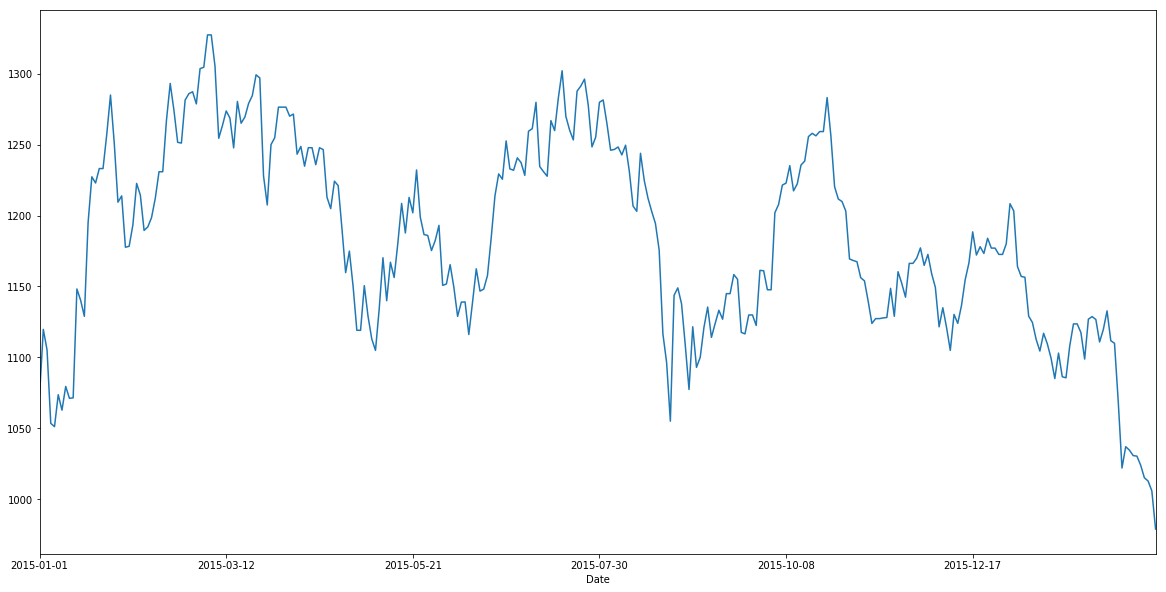

In [3]:
hdfc['Close'][:300].plot(figsize=(20,10))
hdfc = hdfc[:300]

In [4]:
hdfc.shape

(300, 7)

In [5]:
def bul_eglf(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return ((C_1 > O_1) & (O_0 > C_0)) & ((O_0 >= C_1) & (O_1 >= C_0)) & ((O_0 - C_0) > (C_1 - O_1 ))

In [6]:
moving_10 = hdfc['Close'].rolling(10).mean()

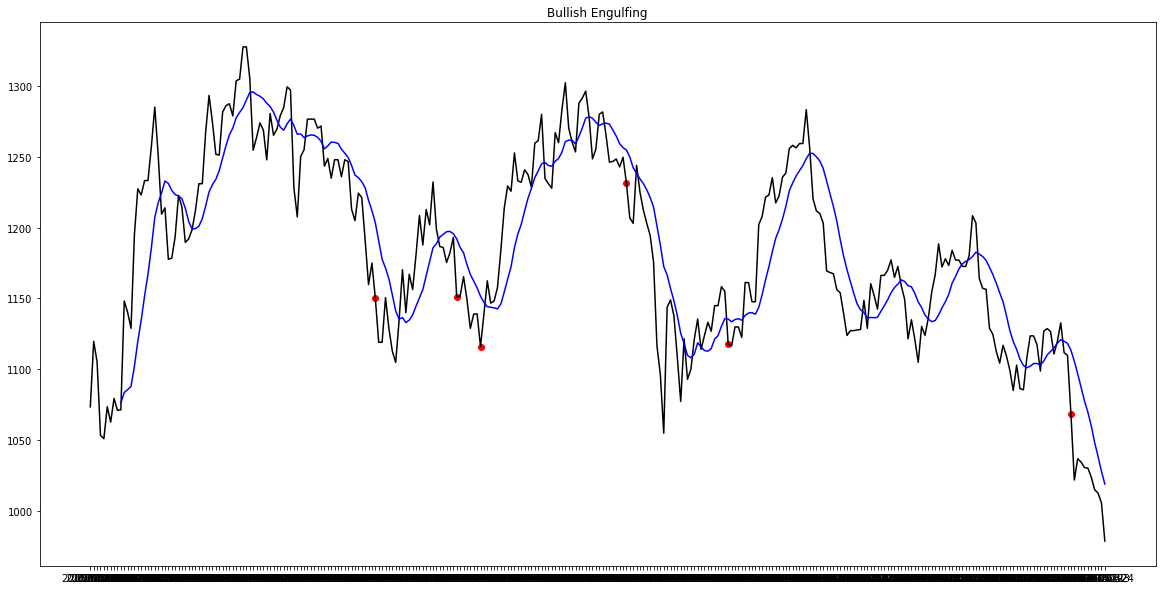

In [7]:
bul_eglf_arr = []
for c in range(2,len(hdfc['Close'])):
    cscore,cpattern=0,''
    lst_2=[hdfc['Open'].iloc[c-2],hdfc['High'].iloc[c-2],hdfc['Low'].iloc[c-2],hdfc['Close'].iloc[c-2]]
    lst_1=[hdfc['Open'].iloc[c-1],hdfc['High'].iloc[c-1],hdfc['Low'].iloc[c-1],hdfc['Close'].iloc[c-1]]
    lst_0=[hdfc['Open'].iloc[c],hdfc['High'].iloc[c],hdfc['Low'].iloc[c],hdfc['Close'].iloc[c]]
    if bul_eglf(lst_0,lst_1,lst_2) and moving_10[c]<moving_10[c-1]:
        bul_eglf_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(hdfc.index,hdfc['Close'],color='black')
plt.scatter(hdfc.index[bul_eglf_arr],hdfc['Close'][bul_eglf_arr],color='red')
plt.plot(hdfc.index,moving_10,color='blue')
plt.title('Bullish Engulfing')
plt.show()

In [8]:
def bear_eglf(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return (O_1 > C_1) & (C_0 > O_0) & (C_0 >= O_1) & (C_1 >= O_0) & ((C_0 - O_0) > (O_1 - C_1 ))

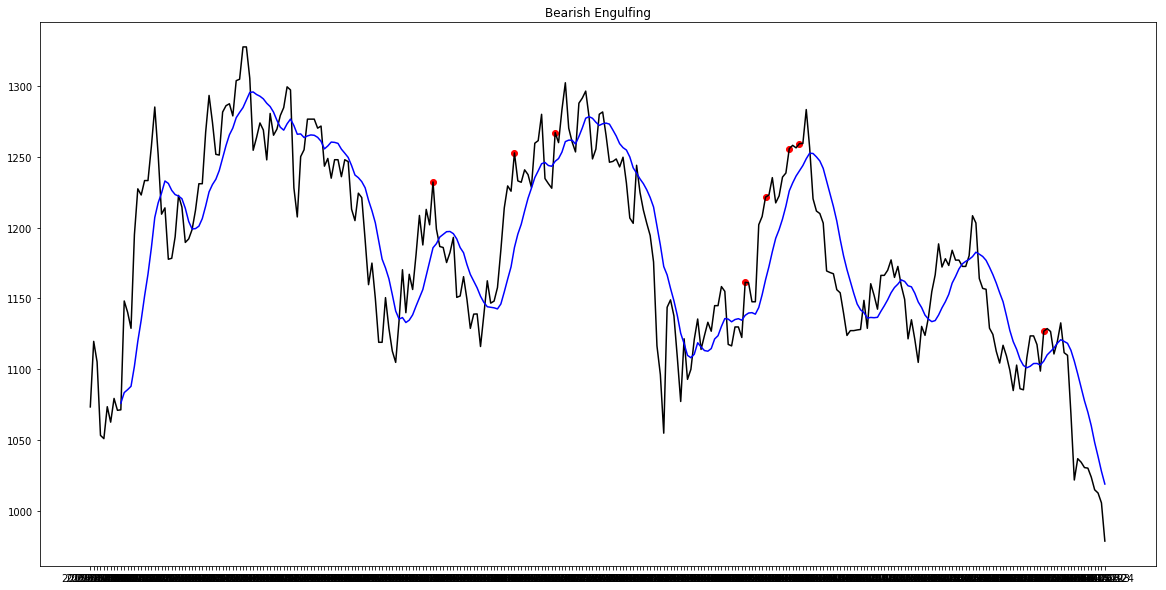

In [9]:
bear_eglf_arr = []
for c in range(2,len(hdfc['Close'])):
    lst_2=[hdfc['Open'].iloc[c-2],hdfc['High'].iloc[c-2],hdfc['Low'].iloc[c-2],hdfc['Close'].iloc[c-2]]
    lst_1=[hdfc['Open'].iloc[c-1],hdfc['High'].iloc[c-1],hdfc['Low'].iloc[c-1],hdfc['Close'].iloc[c-1]]
    lst_0=[hdfc['Open'].iloc[c],hdfc['High'].iloc[c],hdfc['Low'].iloc[c],hdfc['Close'].iloc[c]]
    if bear_eglf(lst_0,lst_1,lst_2) and moving_10[c]>moving_10[c-1]:
        bear_eglf_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(hdfc.index,hdfc['Close'],color='black')
plt.scatter(hdfc.index[bear_eglf_arr],hdfc['Close'][bear_eglf_arr],color='red')
plt.plot(hdfc.index,moving_10,color='blue')
plt.title('Bearish Engulfing')
plt.show()

In [10]:
def bul_har(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return (O_1 > C_1) & (C_0 > O_0) & (C_0 <= O_1) & (C_1 <= O_0) & ((C_0 - O_0) < (O_1 - C_1))
    

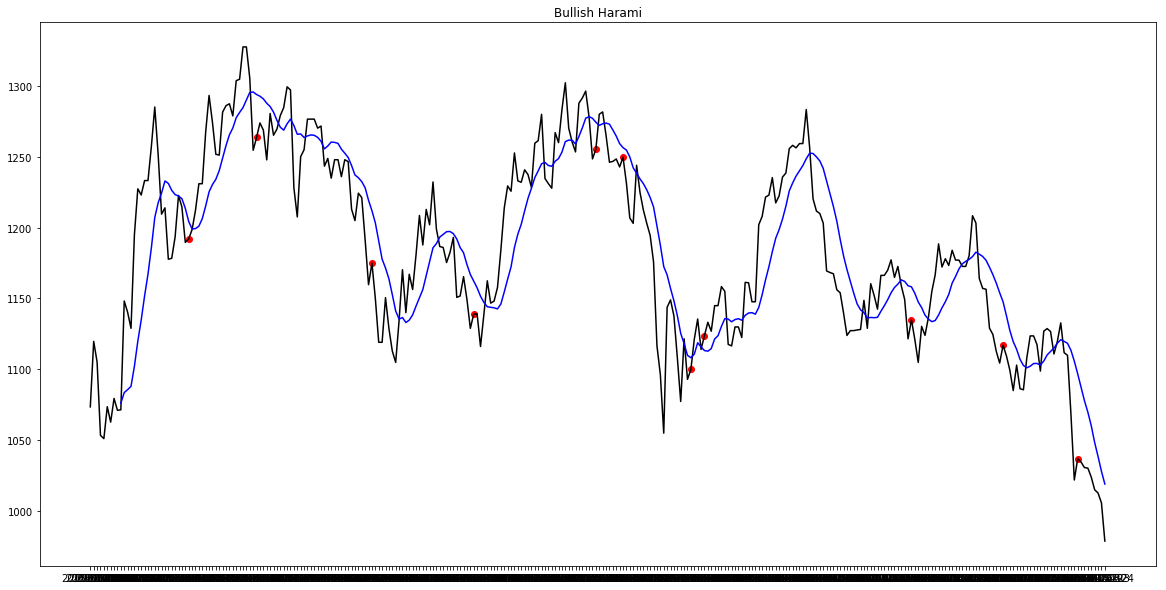

In [11]:
bul_har_arr = []
for c in range(2,len(hdfc['Close'])):
    lst_2=[hdfc['Open'].iloc[c-2],hdfc['High'].iloc[c-2],hdfc['Low'].iloc[c-2],hdfc['Close'].iloc[c-2]]
    lst_1=[hdfc['Open'].iloc[c-1],hdfc['High'].iloc[c-1],hdfc['Low'].iloc[c-1],hdfc['Close'].iloc[c-1]]
    lst_0=[hdfc['Open'].iloc[c],hdfc['High'].iloc[c],hdfc['Low'].iloc[c],hdfc['Close'].iloc[c]]
    if bul_har(lst_0,lst_1,lst_2) and moving_10[c]<moving_10[c-1]:
        bul_har_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(hdfc.index,hdfc['Close'],color='black')
plt.scatter(hdfc.index[bul_har_arr],hdfc['Close'][bul_har_arr],color='red')
plt.plot(hdfc.index,moving_10,color='blue')
plt.title('Bullish Harami')
plt.show()

In [12]:
def bear_har(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return (C_1 > O_1) & (O_0 > C_0) & (O_0 <= C_1) & (O_1 <= C_0) & ((O_0 - C_0) < (C_1 - O_1 ))
    

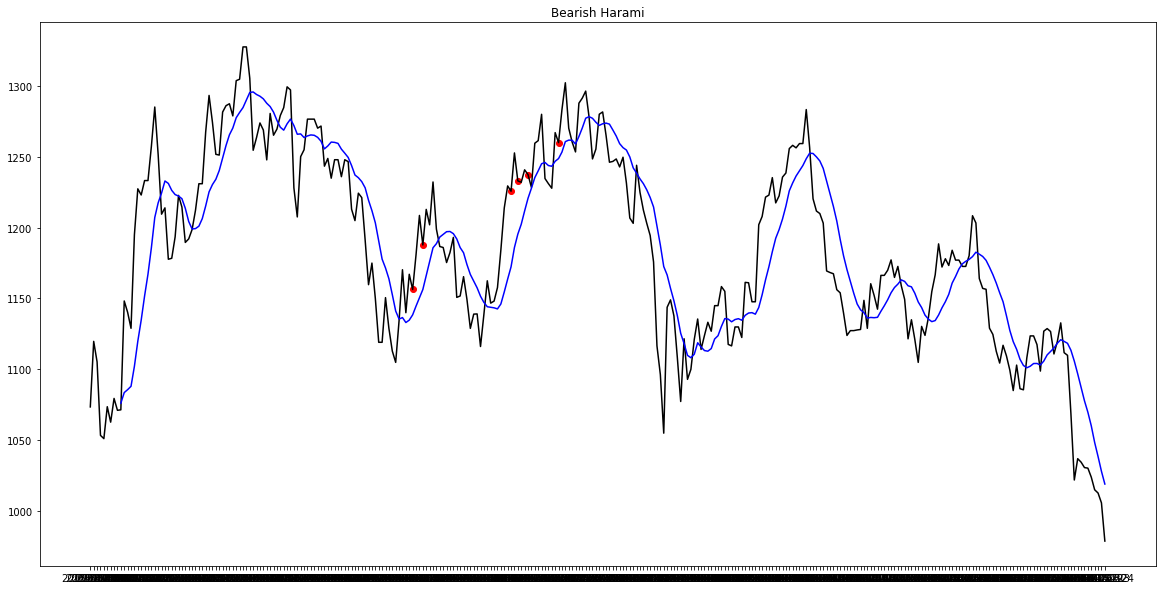

In [13]:
bear_har_arr = []
for c in range(2,len(hdfc['Close'])):
    lst_2=[hdfc['Open'].iloc[c-2],hdfc['High'].iloc[c-2],hdfc['Low'].iloc[c-2],hdfc['Close'].iloc[c-2]]
    lst_1=[hdfc['Open'].iloc[c-1],hdfc['High'].iloc[c-1],hdfc['Low'].iloc[c-1],hdfc['Close'].iloc[c-1]]
    lst_0=[hdfc['Open'].iloc[c],hdfc['High'].iloc[c],hdfc['Low'].iloc[c],hdfc['Close'].iloc[c]]
    if bear_har(lst_0,lst_1,lst_2) and moving_10[c]>moving_10[c-1]:
        bear_har_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(hdfc.index,hdfc['Close'],color='black')
plt.scatter(hdfc.index[bear_har_arr],hdfc['Close'][bear_har_arr],color='red')
plt.plot(hdfc.index,moving_10,color='blue')
plt.title('Bearish Harami')
plt.show()

In [14]:
def eve_star(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return (C_2 > O_2) & (min(O_1, C_1) > C_2) & (O_0 < min(O_1, C_1)) & (C_0 < O_0 )

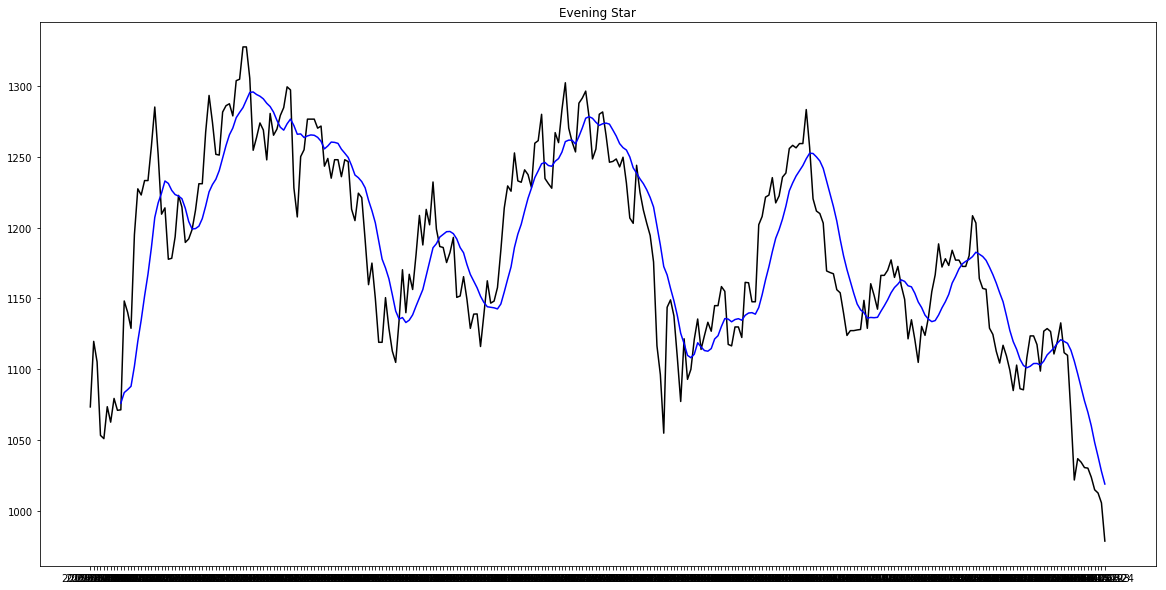

In [15]:
deve_star_arr = []
for c in range(2,len(hdfc['Close'])):
    lst_2=[hdfc['Open'].iloc[c-2],hdfc['High'].iloc[c-2],hdfc['Low'].iloc[c-2],hdfc['Close'].iloc[c-2]]
    lst_1=[hdfc['Open'].iloc[c-1],hdfc['High'].iloc[c-1],hdfc['Low'].iloc[c-1],hdfc['Close'].iloc[c-1]]
    lst_0=[hdfc['Open'].iloc[c],hdfc['High'].iloc[c],hdfc['Low'].iloc[c],hdfc['Close'].iloc[c]]
    if eve_star(lst_0,lst_1,lst_2) and moving_10[c]>moving_10[c-1]:
        deve_star_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(hdfc.index,hdfc['Close'],color='black')
plt.scatter(hdfc.index[deve_star_arr],hdfc['Close'][deve_star_arr],color='red')
plt.plot(hdfc.index,moving_10,color='blue')
plt.title('Evening Star')
plt.show()

In [16]:
def mor_star(lst_0,lst_1,lst_2):    
    
    O_0,H_0,L_0,C_0=lst_0[0],lst_0[1],lst_0[2],lst_0[3]
    O_1,H_1,L_1,C_1=lst_1[0],lst_1[1],lst_1[2],lst_1[3]
    O_2,H_2,L_2,C_2=lst_2[0],lst_2[1],lst_2[2],lst_2[3]
    
    return (C_2 < O_2) & (min(O_1, C_1) < C_2) & (O_0 > min(O_1, C_1)) & (C_0 > O_0 )

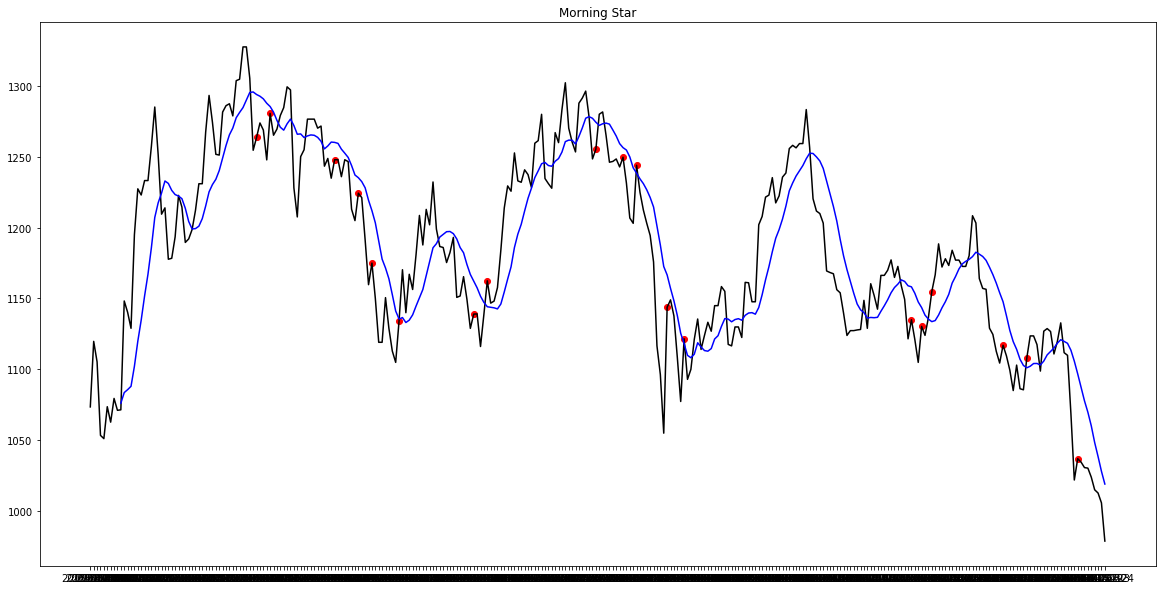

In [17]:
mor_star_arr = []
for c in range(2,len(hdfc['Close'])):
    lst_2=[hdfc['Open'].iloc[c-2],hdfc['High'].iloc[c-2],hdfc['Low'].iloc[c-2],hdfc['Close'].iloc[c-2]]
    lst_1=[hdfc['Open'].iloc[c-1],hdfc['High'].iloc[c-1],hdfc['Low'].iloc[c-1],hdfc['Close'].iloc[c-1]]
    lst_0=[hdfc['Open'].iloc[c],hdfc['High'].iloc[c],hdfc['Low'].iloc[c],hdfc['Close'].iloc[c]]
    if mor_star(lst_0,lst_1,lst_2) and moving_10[c]<moving_10[c-1]:
        mor_star_arr.append(c)
            
plt.figure(figsize=(20,10))
plt.plot(hdfc.index,hdfc['Close'],color='black')
plt.scatter(hdfc.index[mor_star_arr],hdfc['Close'][mor_star_arr],color='red')
plt.plot(hdfc.index,moving_10,color='blue')
plt.title('Morning Star')
plt.show()